This notebook implements a machine learning pipeline for predicting the severity of road traffic accidents. It includes the following steps:

**Data Preprocessing:**
Libraries like pandas, numpy, and scikit-learn are used for handling and preprocessing the dataset.

**Data Visualization:**
Tools like matplotlib and seaborn help explore the data and identify trends.

**Modeling:**
Several machine learning algorithms are tested, including:

Logistic Regression
Decision Tree
Support Vector Machines (SVM)
K-Nearest Neighbors (KNN)
Random Forest
Gradient Boosting
AdaBoost
Evaluation Metrics:
Models are evaluated using metrics like accuracy, F1-score, ROC-AUC, and confusion matrices.

**Balancing Data:**
The SMOTE technique is used to address imbalanced datasets.

**Hyperparameter Tuning:**
GridSearchCV and RepeatedStratifiedKFold are employed for optimizing model performance.

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [122]:
df = pd.read_csv('RTA Dataset.csv')

In [123]:
for c in df.columns:
    print(c, df[c].unique()[:10])

Time ['17:02:00' '1:06:00' '14:15:00' '17:30:00' '17:20:00' '14:40:00'
 '17:45:00' '22:45:00' '8:20:00' '15:10:00']
Day_of_week ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
Age_band_of_driver ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
Sex_of_driver ['Male' 'Female' 'Unknown']
Educational_level ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
Vehicle_driver_relation ['Employee' 'Unknown' 'Owner' nan 'Other']
Driving_experience ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
Type_of_vehicle ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q']
Owner_of_vehicle ['Owner' 'Governmental' nan 'Organization' 'Other']
Service_year_of_vehicle ['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'Below 1yr']
Defect_of_vehicle ['No defect' nan '7' '5']

In [124]:
df['Time']= pd.to_datetime(df['Time'])

In [125]:
for c in df.columns:
    print(c, df[c].unique()[:3])

Time <DatetimeArray>
['2024-12-19 17:02:00', '2024-12-19 01:06:00', '2024-12-19 14:15:00']
Length: 3, dtype: datetime64[ns]
Day_of_week ['Monday' 'Sunday' 'Friday']
Age_band_of_driver ['18-30' '31-50' 'Under 18']
Sex_of_driver ['Male' 'Female' 'Unknown']
Educational_level ['Above high school' 'Junior high school' nan]
Vehicle_driver_relation ['Employee' 'Unknown' 'Owner']
Driving_experience ['1-2yr' 'Above 10yr' '5-10yr']
Type_of_vehicle ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)']
Owner_of_vehicle ['Owner' 'Governmental' nan]
Service_year_of_vehicle ['Above 10yr' '5-10yrs' nan]
Defect_of_vehicle ['No defect' nan '7']
Area_accident_occured ['Residential areas' 'Office areas' '  Recreational areas']
Lanes_or_Medians [nan 'Undivided Two way' 'other']
Road_allignment ['Tangent road with flat terrain' nan
 'Tangent road with mild grade and flat terrain']
Types_of_Junction ['No junction' 'Y Shape' 'Crossing']
Road_surface_type ['Asphalt roads' 'Earth roads' nan]
Road_surface_condi

In [126]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
12311,False
12312,False
12313,False
12314,False


In [127]:
df.groupby('Accident_severity').size()

,0
Accident_severity,
Fatal injury,158
Serious Injury,1743
Slight Injury,10415


In [128]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


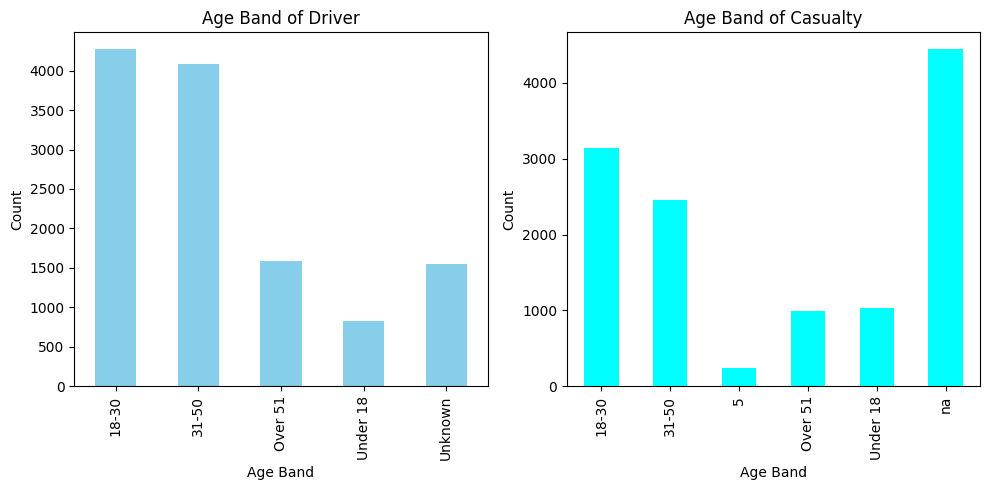

In [129]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['Age_band_of_driver'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Age Band of Driver')
plt.xlabel('Age Band')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['Age_band_of_casualty'].value_counts().sort_index().plot(kind='bar', color='aqua')
plt.title('Age Band of Casualty')
plt.xlabel('Age Band')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

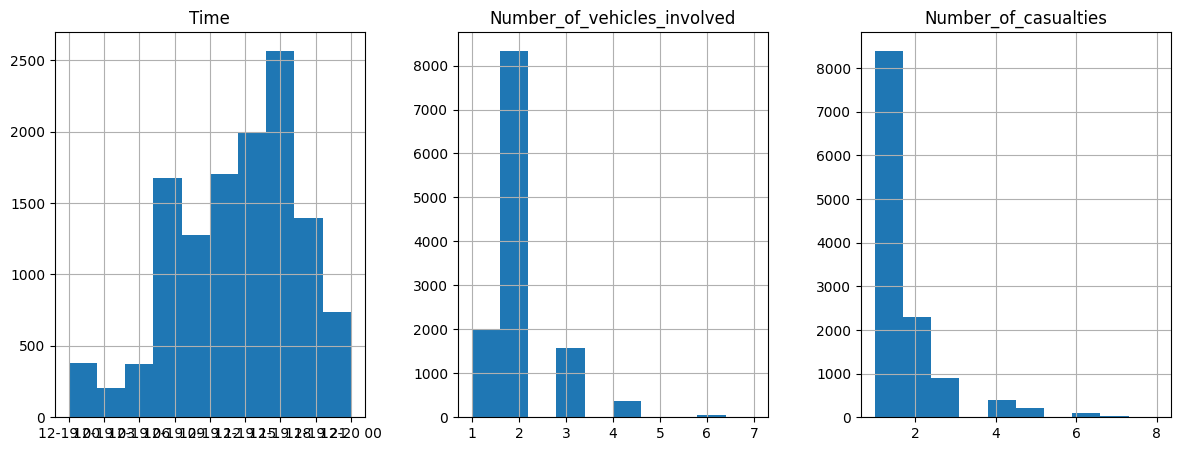

In [130]:
df.hist(layout=(1,6), figsize=(30,5))
plt.show()

In [131]:
df['Number_of_casualties'].value_counts()

,count
Number_of_casualties,
1,8397
2,2290
3,909
4,394
5,207
6,89
7,22
8,8


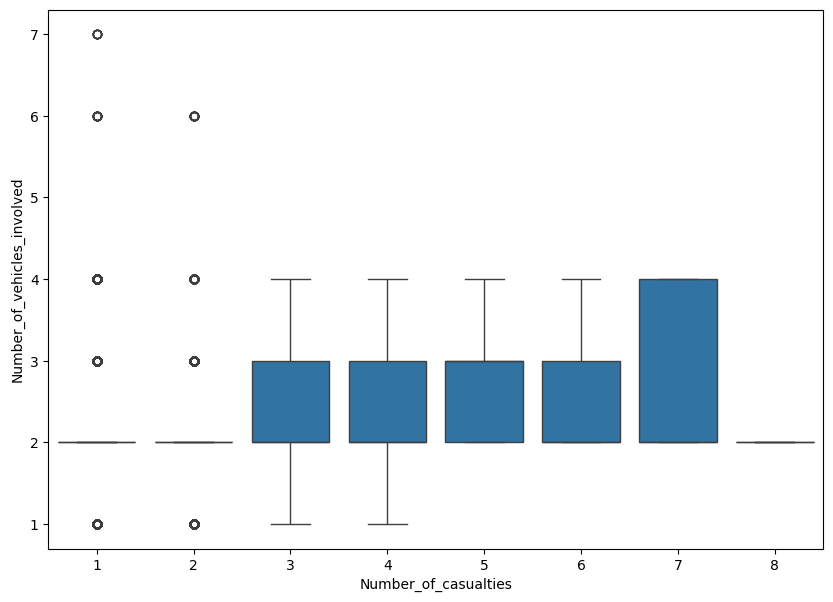

In [132]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, y='Number_of_vehicles_involved', x='Number_of_casualties')
plt.show()

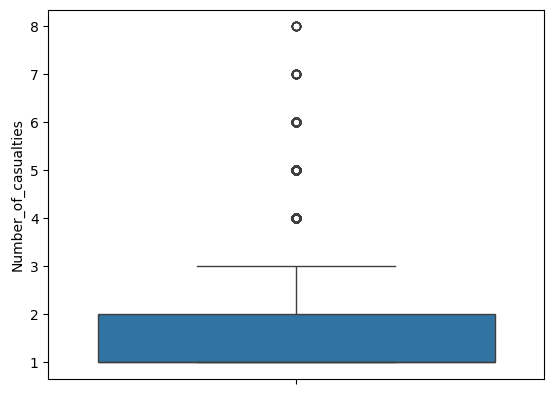

In [133]:
sns.boxplot(data=df, y='Number_of_casualties')
plt.show()

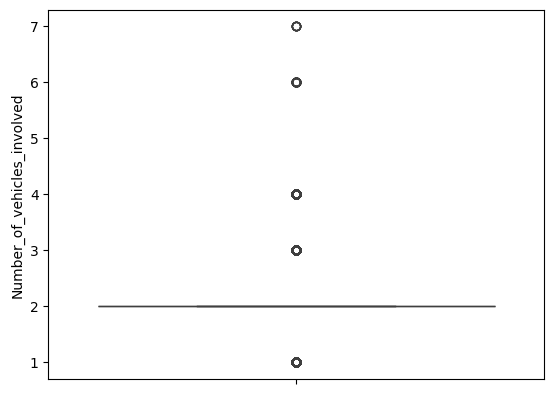

In [134]:
sns.boxplot(data=df, y='Number_of_vehicles_involved')
plt.show()

In [135]:
df['Number_of_vehicles_involved']

,Number_of_vehicles_involved
0,2
1,2
2,2
3,2
4,2
...,...
12311,2
12312,2
12313,1
12314,2


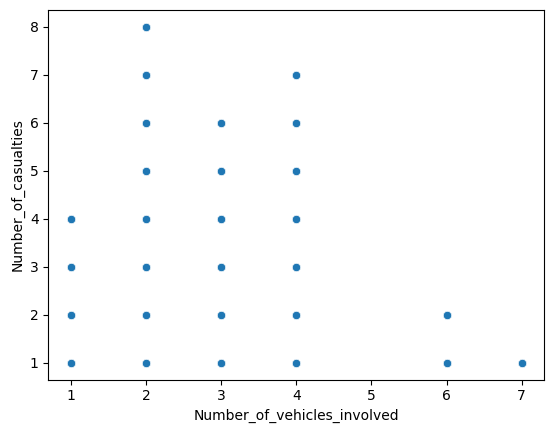

In [136]:
sns.scatterplot(x=df['Number_of_vehicles_involved'], y=df['Number_of_casualties'])
plt.show()

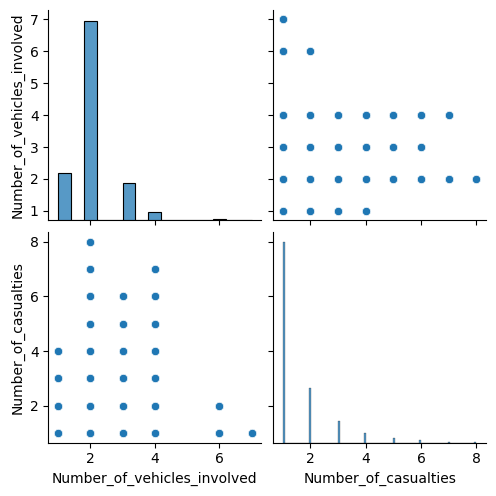

In [137]:
sns.pairplot(df[['Number_of_vehicles_involved','Number_of_casualties']])
plt.show()

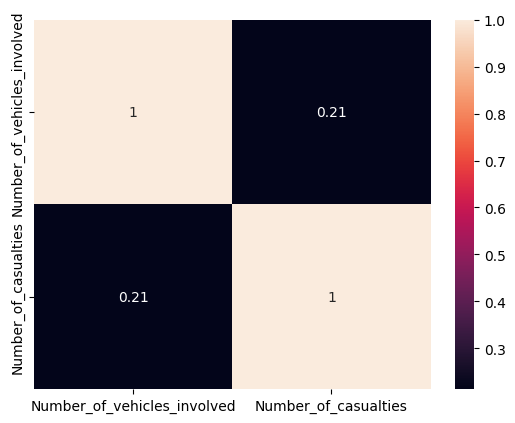

In [138]:
correlation_matrix = df[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

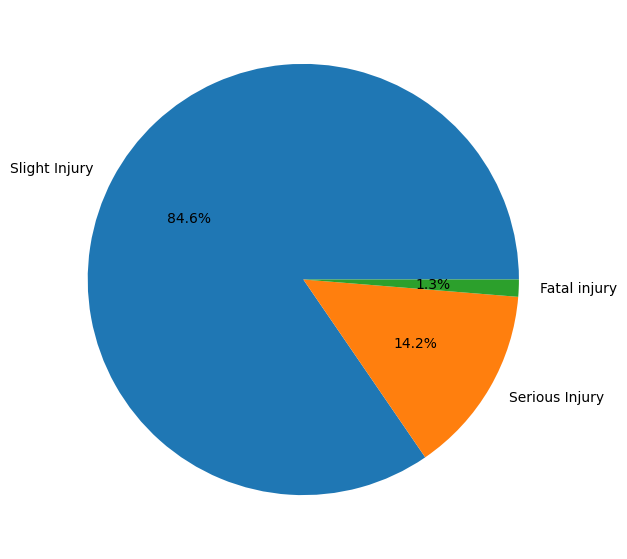

In [139]:
plt.figure(figsize=(10,7))
plt.pie(x=df['Accident_severity'].value_counts().values,
        labels=df['Accident_severity'].value_counts().index,
        autopct='%2.1f%%')
plt.show()

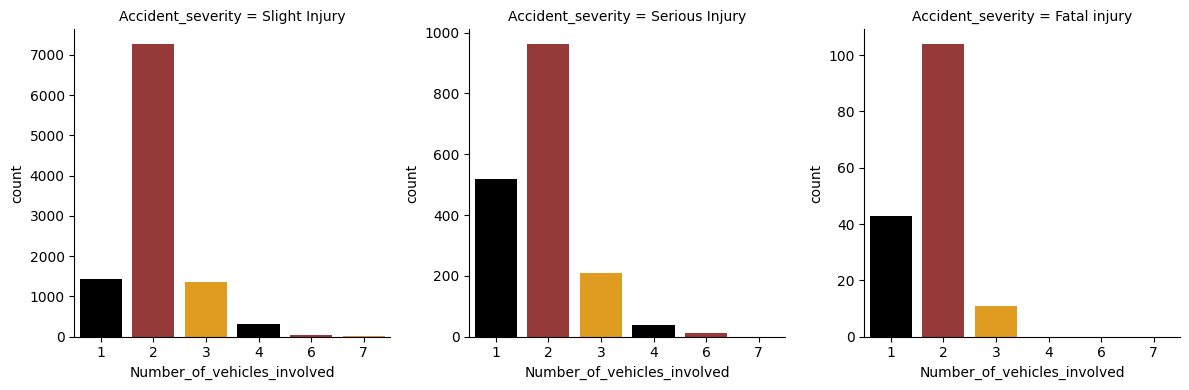

In [140]:
grid = sns.FacetGrid(data=df, col='Accident_severity', height=4, aspect=1, sharey=False)

grid.map(sns.countplot, 'Number_of_vehicles_involved', palette=['black', 'brown', 'orange'])
plt.show()

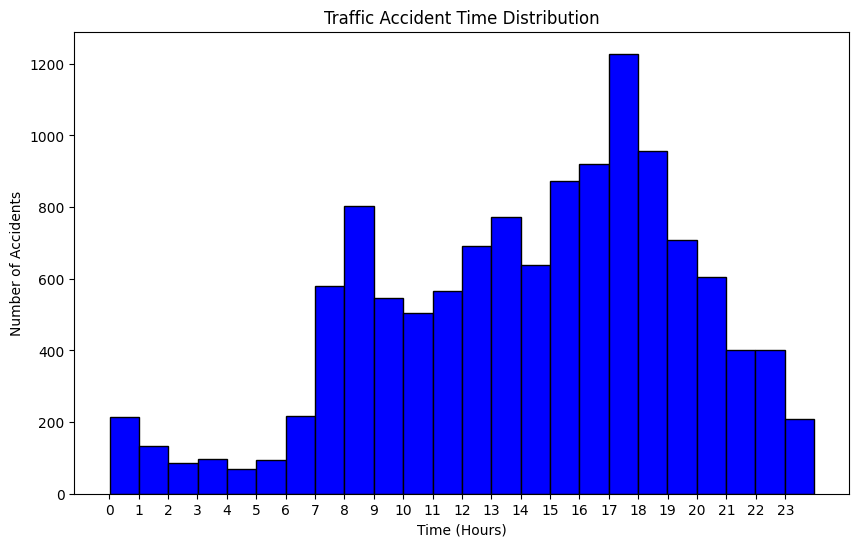

In [141]:
df['TimeInSeconds'] = df['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)


plt.figure(figsize=(10,6))
plt.hist(df['TimeInSeconds'], bins=24, color='blue', edgecolor='black')
plt.title('Traffic Accident Time Distribution')
plt.xlabel('Time (Hours)')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24 * 3600, 3600), range(24))
plt.show()

In [142]:
lists = ['Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality',
         'Day_of_week', 'Casualty_severity', 'Time', 'Sex_of_driver',
         'Educational_level', 'Defect_of_vehicle', 'Owner_of_vehicle',
         'Service_year_of_vehicle', 'Road_surface_type', 'Sex_of_casualty']

df.drop(columns=lists, inplace=True, errors='ignore')

In [143]:
df.shape

(12316, 20)

In [144]:
df.columns

Index(['Age_band_of_driver', 'Driving_experience', 'Type_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity',
       'TimeInSeconds'],
      dtype='object')

In [145]:
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0], inplace=True)
df['Age_band_of_driver'].fillna(df['Age_band_of_driver'].mode()[0], inplace=True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0], inplace=True)
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0], inplace=True)
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0], inplace=True)
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0], inplace=True)
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0], inplace=True)
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0], inplace=True)

In [146]:
df.isnull().sum()

,0
Age_band_of_driver,0
Driving_experience,0
Type_of_vehicle,0
Area_accident_occured,0
Lanes_or_Medians,0
Road_allignment,0
Types_of_Junction,0
Road_surface_conditions,0
Light_conditions,0
Weather_conditions,0


Class 0: 10415
Class 1: 1743
Proportion: 5.98 : 1


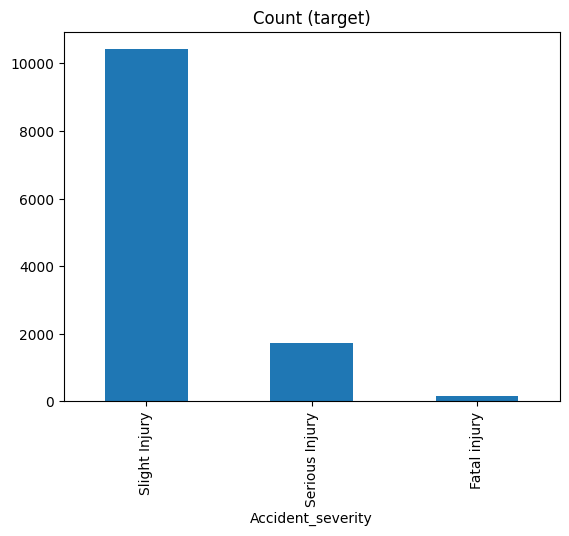

In [147]:
target_count = df['Accident_severity'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [148]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df=df.apply(LE.fit_transform)

<Axes: >

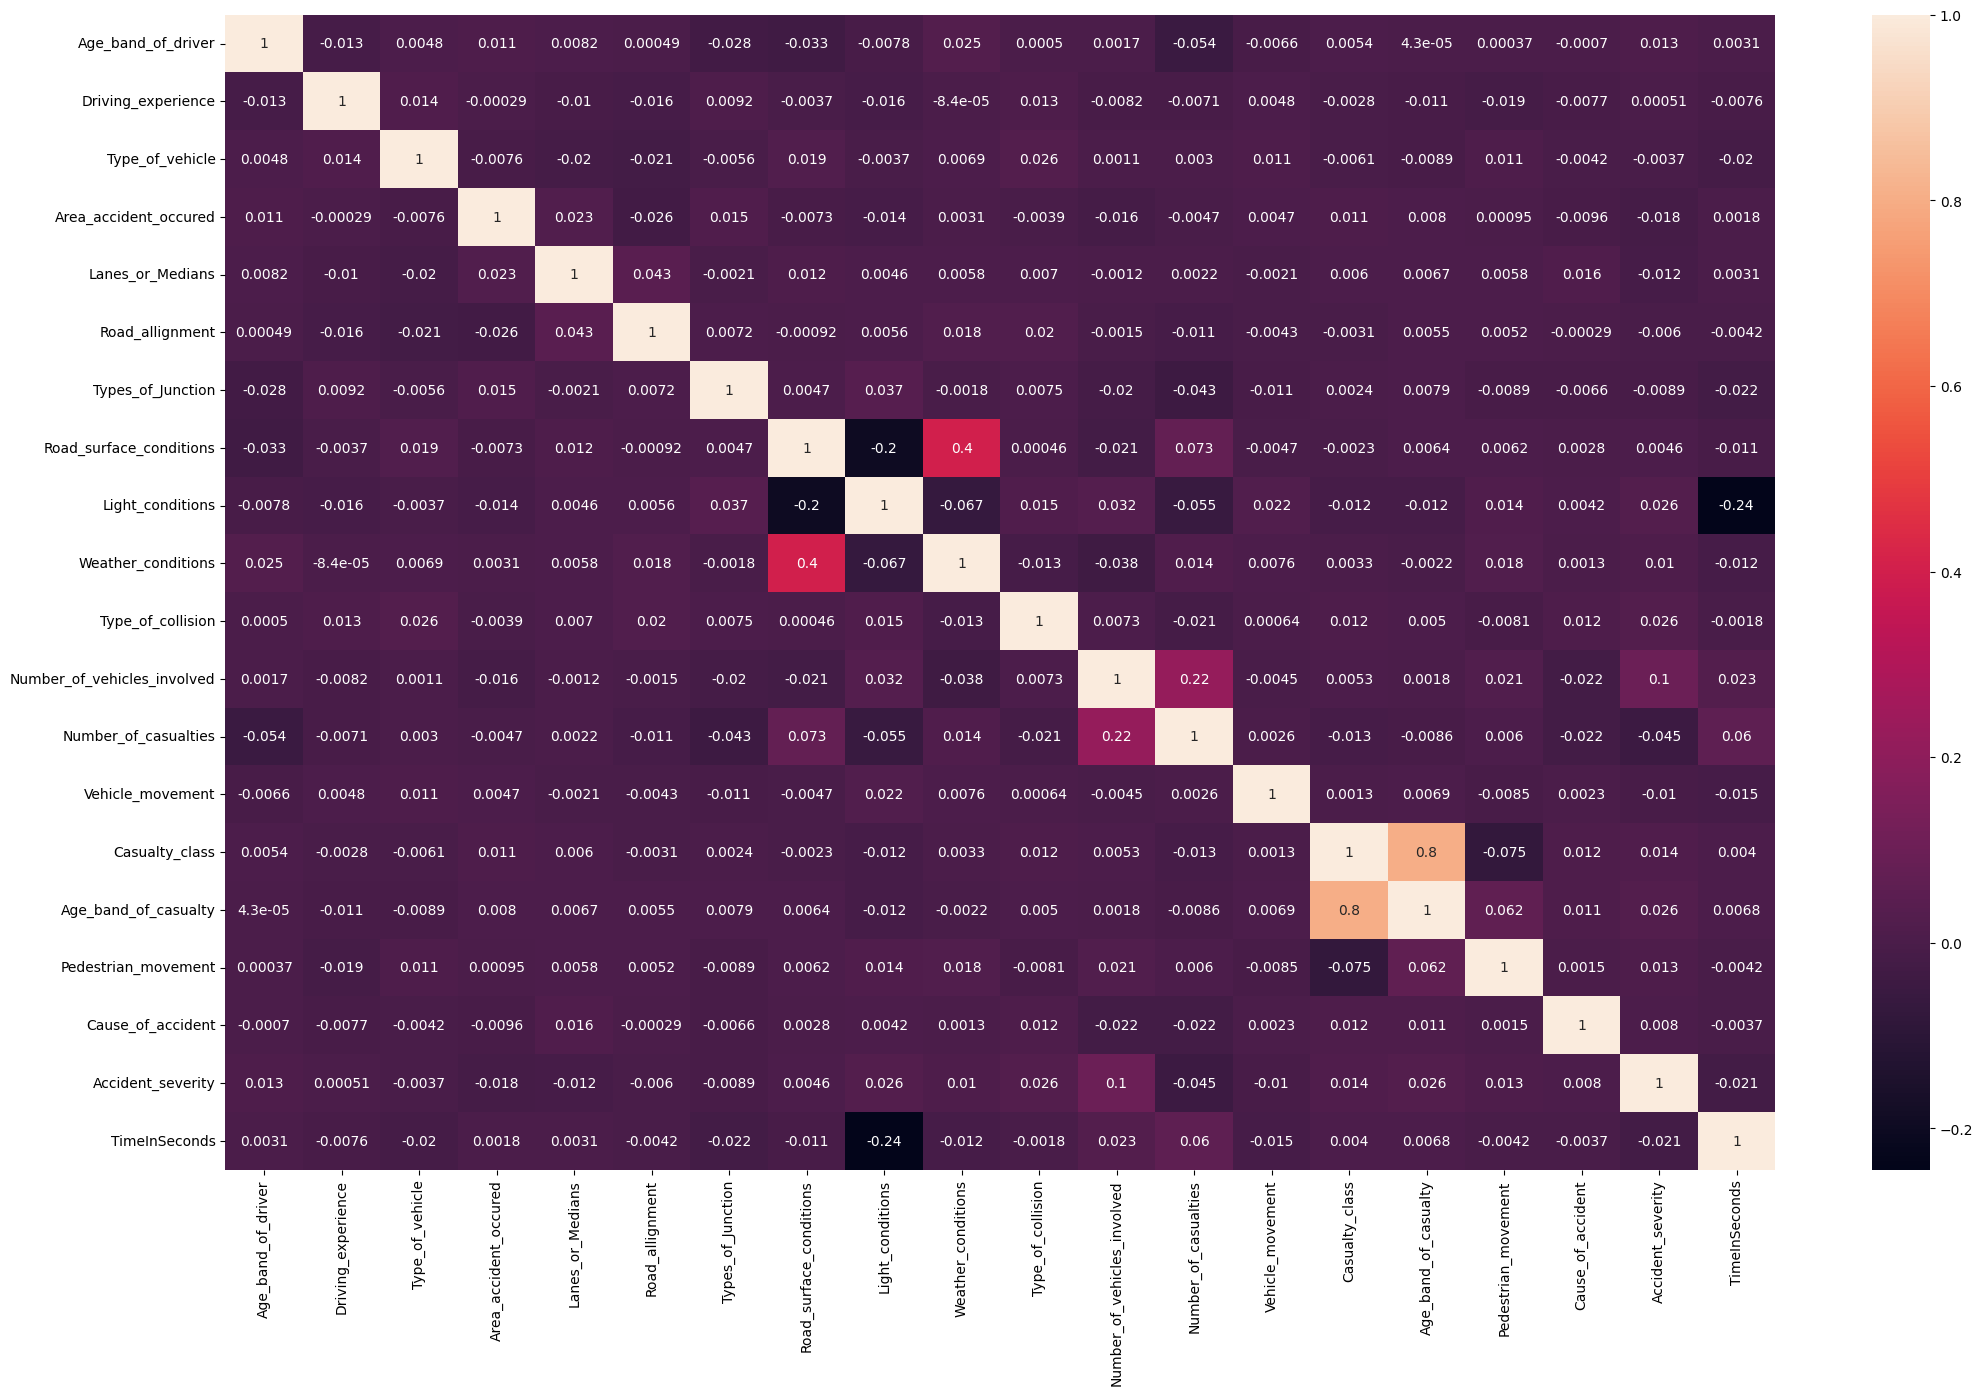

In [149]:
plt.figure(figsize=[25,15])
sns.heatmap(df.corr(),annot=True)

In [150]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 22:
        sns.countplot(y=col, data=df)
        plt.show()

In [151]:
x = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(8621, 19) (3695, 19) (8621,) (3695,)


In [152]:
counter = Counter(ytrain)



for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
xtrain, ytrain = oversample.fit_resample(xtrain, ytrain)

counter = Counter(ytrain)



for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")



print("Upsampled data shape: ", xtrain.shape, ytrain.shape)

Class= 2, n=7324 (84.96%)
Class= 1, n=1191 (13.82%)
Class= 0, n=106 (1.23%)
Class= 2, n=7324 (33.33%)
Class= 1, n=7324 (33.33%)
Class= 0, n=7324 (33.33%)
Upsampled data shape:  (21972, 19) (21972,)


In [153]:
X=df.drop(columns=["Accident_severity"])
y=df["Accident_severity"]

In [154]:
from sklearn.multiclass import OneVsRestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": OneVsRestClassifier(LogisticRegression(C=1.0, solver='liblinear', penalty='l2')),
    "DecisionTreeClassifier": OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)),
    "KNeighborsClassifier": OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)),
    "RandomForestClassifier": OneVsRestClassifier(RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=8)),
    "AdaBoostClassifier": OneVsRestClassifier(AdaBoostClassifier(n_estimators=200, learning_rate=0.1)),
    "GradientBoostingClassifier": OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5))
}

accuracies = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[model_name] = acc

for model_name, acc in accuracies.items():
    print(f"Accuracy of {model_name}: {acc * 100:.2f}%")

Accuracy of LogisticRegression: 83.77%
Accuracy of DecisionTreeClassifier: 84.17%
Accuracy of KNeighborsClassifier: 82.47%
Accuracy of RandomForestClassifier: 83.85%
Accuracy of AdaBoostClassifier: 83.77%
Accuracy of GradientBoostingClassifier: 84.70%


In [155]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

base_models = [
    ("LogisticRegression", LogisticRegression(C=1.0, solver='liblinear', penalty='l2')),
    ("DecisionTree", DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)),
    ("GradientBoosting", GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5))
]

ensemble_model = VotingClassifier(estimators=base_models, voting='hard')

ensemble_model.fit(X_train, y_train)

y_pred_ensemble = ensemble_model.predict(X_test)

ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)

print(f"Accuracy of Ensemble Model (VotingClassifier): {ensemble_accuracy * 100:.2f}%")

Accuracy of Ensemble Model (VotingClassifier): 84.21%


In [156]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

base_models = [
    ("LogisticRegression", LogisticRegression(C=1.0, solver='liblinear', penalty='l2')),
    ("DecisionTree", DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)),
    ("GradientBoosting", GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5))
]

ensemble_model = VotingClassifier(
    estimators=base_models,
    voting='soft',
    weights=[2, 1, 3]
)

ensemble_model.fit(X_train, y_train)

y_pred_ensemble = ensemble_model.predict(X_test)

ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)

print(f"Accuracy of Improved Ensemble Model (VotingClassifier with Soft Voting): {ensemble_accuracy * 100:.2f}%")

Accuracy of Improved Ensemble Model (VotingClassifier with Soft Voting): 84.29%


In [157]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

boosting_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    random_state=42
)

boosting_model.fit(X_train, y_train)

y_pred_boosting = boosting_model.predict(X_test)

boosting_accuracy = accuracy_score(y_test, y_pred_boosting)

print(f"Accuracy of Boosting Model (GradientBoostingClassifier): {boosting_accuracy * 100:.2f}%")

Accuracy of Boosting Model (GradientBoostingClassifier): 84.70%


In [158]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

base_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

bagging_model = BaggingClassifier(
    estimator=base_model,
    n_estimators=50,
    max_samples=0.8,
    max_features=1.0,
    bootstrap=True,
    random_state=42
)


bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)

bagging_accuracy = accuracy_score(y_test, y_pred_bagging)

print(f"Accuracy of Bagging Model (BaggingClassifier): {bagging_accuracy * 100:.2f}%")

Accuracy of Bagging Model (BaggingClassifier): 84.21%


In [159]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import numpy as np

base_models = [
    ("LogisticRegression", LogisticRegression(C=1.0, solver='liblinear', penalty='l2')),
    ("DecisionTree", DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)),
    ("GradientBoosting", GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5))
]

voting_model = VotingClassifier(estimators=base_models, voting='hard')

voting_model.fit(X_train, y_train)

y_pseudo_labels = voting_model.predict(X_test)

X_augmented = np.vstack([X_train, X_test])
y_augmented = np.hstack([y_train, y_pseudo_labels])

voting_model.fit(X_augmented, y_augmented)

y_pred_self_ensembling = voting_model.predict(X_test)
self_ensembling_accuracy = accuracy_score(y_test, y_pred_self_ensembling)

print(f"Accuracy of Self-Ensembling Model: {self_ensembling_accuracy * 100:.2f}%")

Accuracy of Self-Ensembling Model: 84.29%
